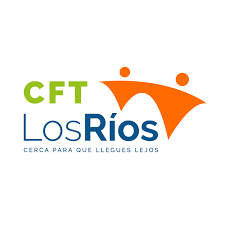
## Taller de Analítica
### Series de Tiempo Aplicada
#### Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('raw_sales.csv')

In [3]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


# PREPROCESAMIENTO

In [5]:
df.isnull().sum()


datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [6]:
# Inspeccionar los primeros valores de la columna
print(df['datesold'].head())

# Reemplazar posibles valores incorrectos
# Por ejemplo, si hay valores vacíos o nulos que deberían ser reemplazados
df['datesold'] = df['datesold'].replace('', pd.NA)

# Convertir la columna a datetime
df['datesold'] = pd.to_datetime(df['datesold'], errors='coerce')

# Verificar la conversión
print(df['datesold'].head())


0    2007-02-07 00:00:00
1    2007-02-27 00:00:00
2    2007-03-07 00:00:00
3    2007-03-09 00:00:00
4    2007-03-21 00:00:00
Name: datesold, dtype: object
0   2007-02-07
1   2007-02-27
2   2007-03-07
3   2007-03-09
4   2007-03-21
Name: datesold, dtype: datetime64[ns]


In [7]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [8]:
df.describe()

,datesold,postcode,price,bedrooms
count,29580,29580.000000,2.958000e+04,29580.000000
mean,2015-02-21 07:35:42.474645248,2730.249730,6.097363e+05,3.250169
min,2007-02-07 00:00:00,2600.000000,5.650000e+04,0.000000
25%,2013-02-05 00:00:00,2607.000000,4.400000e+05,3.000000
50%,2015-09-30 00:00:00,2615.000000,5.500000e+05,3.000000
75%,2017-07-26 00:00:00,2905.000000,7.050000e+05,4.000000
max,2019-07-27 00:00:00,2914.000000,8.000000e+06,5.000000
std,NaN,146.717292,2.817079e+05,0.951275


In [9]:
#establecer fecha como indice
df.set_index('datesold', inplace=True)


In [10]:
df.head()

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29580 entries, 2007-02-07 to 2019-07-26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      29580 non-null  int64 
 1   price         29580 non-null  int64 
 2   propertyType  29580 non-null  object
 3   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [12]:
df.duplicated().sum()  # Contar duplicados
df.drop_duplicates(inplace=True)  # Eliminar duplicados
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14860 entries, 2007-02-07 to 2019-07-26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      14860 non-null  int64 
 1   price         14860 non-null  int64 
 2   propertyType  14860 non-null  object
 3   bedrooms      14860 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 580.5+ KB


In [13]:
# Rellenar valores faltantes con interpolación
df.interpolate(method='time', inplace=True)

# O eliminar filas con valores faltantes
df.dropna(inplace=True)


C:\Users\Diego\AppData\Local\Temp\ipykernel_7452\1456733.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='time', inplace=True)


In [14]:
df['propertyType'].value_counts()

propertyType
house    11691
unit      3169
Name: count, dtype: int64

In [15]:
df['bedrooms'].value_counts()

bedrooms
3    5142
4    4843
2    2318
5    1486
1    1041
0      30
Name: count, dtype: int64

#GUARDAR DATASET LIMPIO

In [16]:
#df = pd.read_csv("dataset_limpio 1.csv")

In [17]:
# Establecer el formato de punto flotante a 2 decimales
pd.options.display.float_format = '{:.2f}'.format
# Resumen estadistico
df.describe()

,postcode,price,bedrooms
count,14860.00,14860.00,14860.00
mean,2718.73,646709.75,3.22
std,144.59,342410.42,1.06
min,2600.00,56500.00,0.00
25%,2605.00,438500.00,3.00
50%,2615.00,572000.00,3.00
75%,2905.00,761000.00,4.00
max,2914.00,8000000.00,5.00


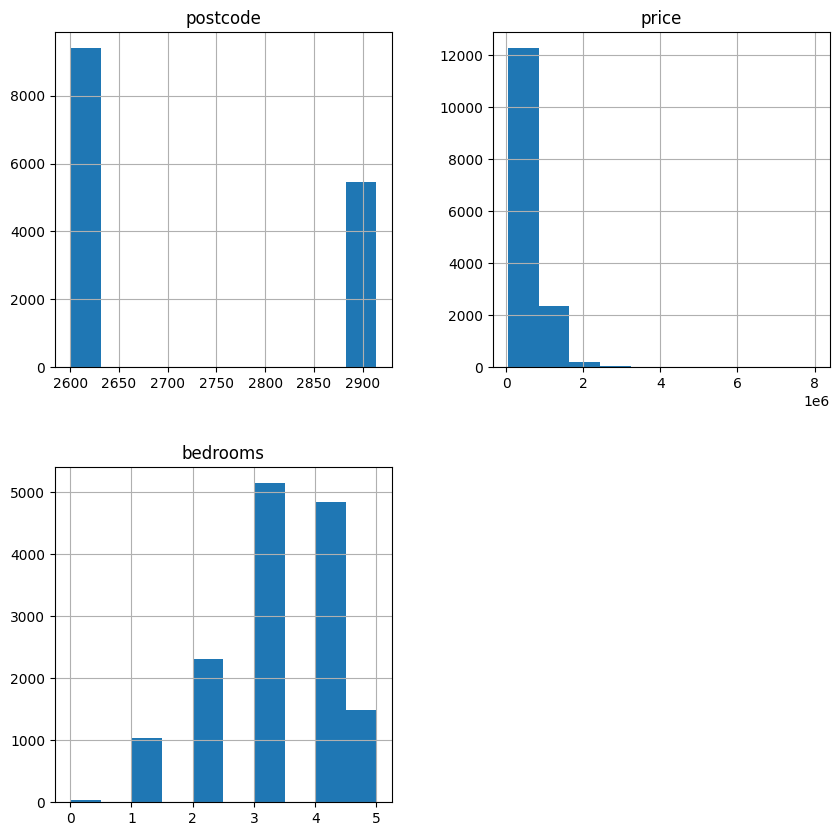

In [18]:
# Histograma
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10))
plt.show()

In [19]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

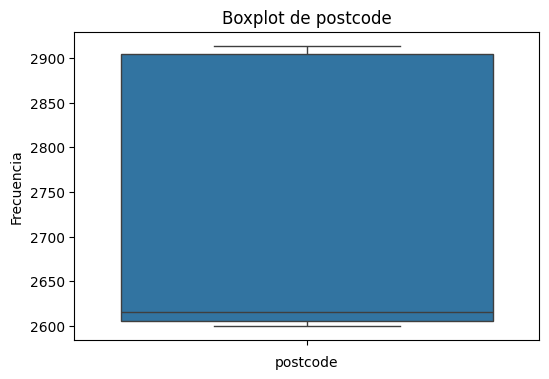

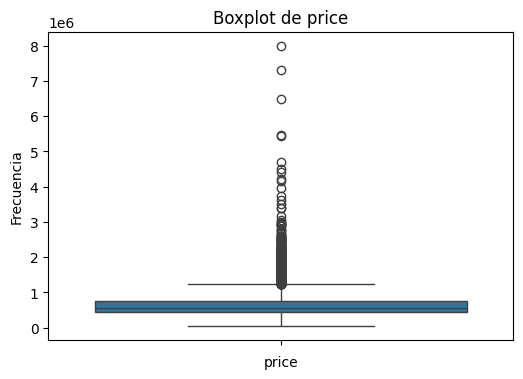

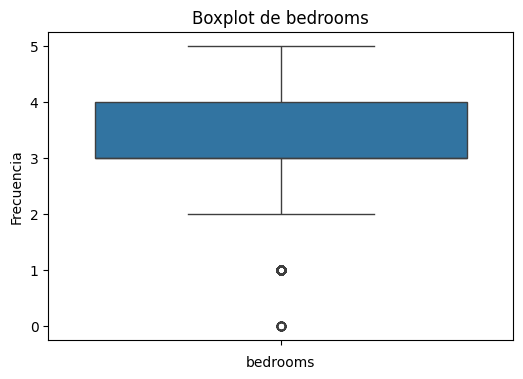

In [20]:
# Importar librería para gráficos
import seaborn as sb
from seaborn import boxplot

# Itera a través de las columnas numéricas y crea gráficos de boxplot
for column in df_numeric.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    boxplot(df[column])  # Gráfico de densidad
    plt.xlabel(column)  # Título del eje x con el nombre de la columna
    plt.ylabel("Frecuencia")  # Título del eje Y
    plt.title(f"Boxplot de {column}")  # Título del gráfico
    plt.show()  # Mostrar el gráfico

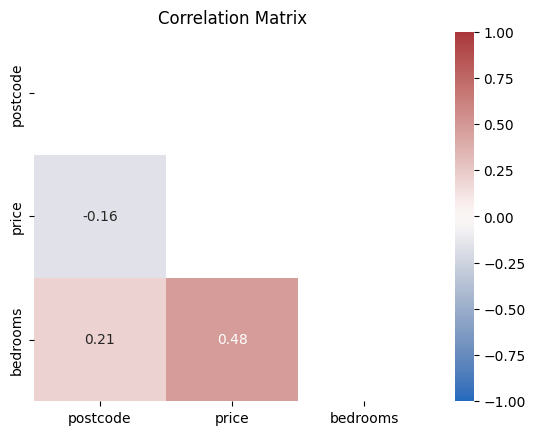

In [21]:
# Correlacion entre series
import numpy as np
matrix = df_numeric.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sb.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title('Correlation Matrix')
plt.show()

<Figure size 640x480 with 0 Axes>

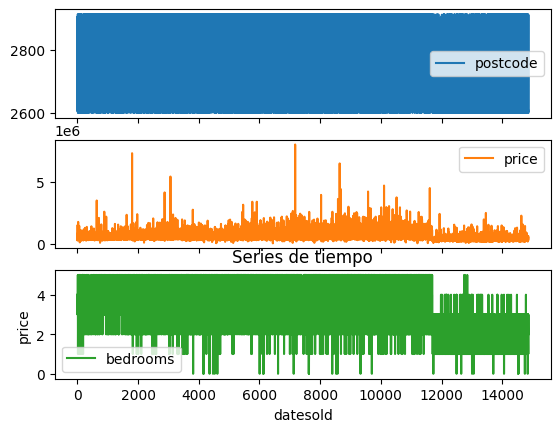

In [22]:
# Series de tiempo
plt.figure()
df.plot(subplots=True, use_index=False)
plt.xlabel('datesold')
plt.ylabel('price')
plt.title('Series de tiempo')
plt.show()

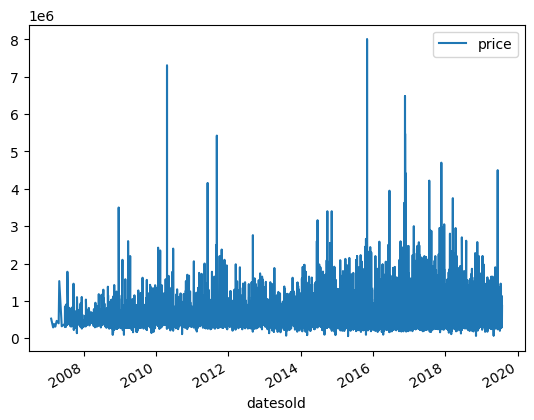

In [23]:
# Serie de tiempo
df.plot(y="price")
plt.show()

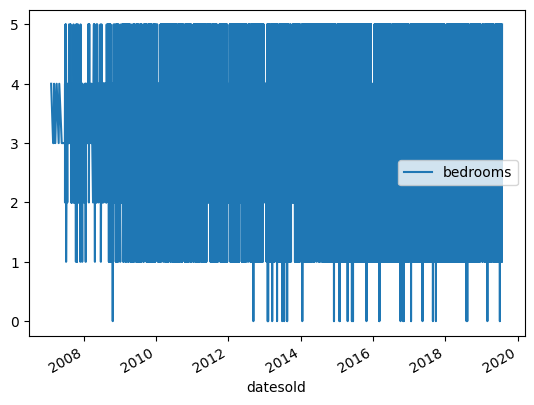

In [24]:
# Serie de tiempo
df.plot(y="bedrooms")
plt.show()

#Descomposición

In [25]:
# Importar libreria para realizar descomposición de la serie
from statsmodels.tsa.api import (seasonal_decompose)

In [26]:
# Establecer formato de tamaño de gráficos
plt.rcParams["figure.figsize"] = [8, 5]

Text(0.5, 1.05, 'Descomposición de la serie en 30 días (modelo aditivo)')

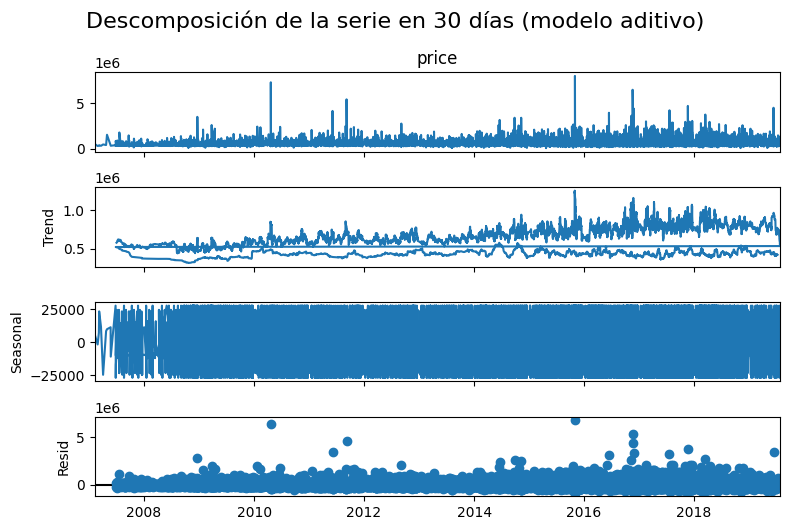

In [27]:
# Descomposición de la serie
sd = seasonal_decompose(df["price"],period=30)
sd.plot();
plt.suptitle('Descomposición de la serie en 30 días (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo aditivo)')

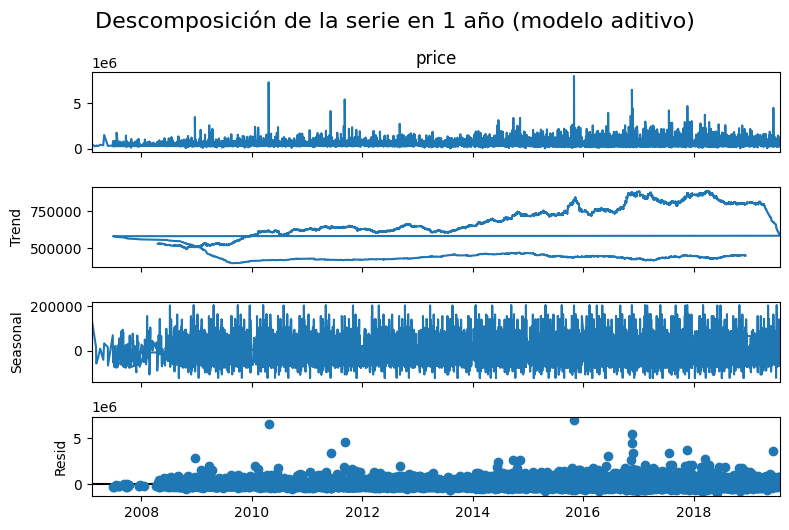

In [28]:
# Descomposición de la serie
sd = seasonal_decompose(df["price"],period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo multiplicativo)')

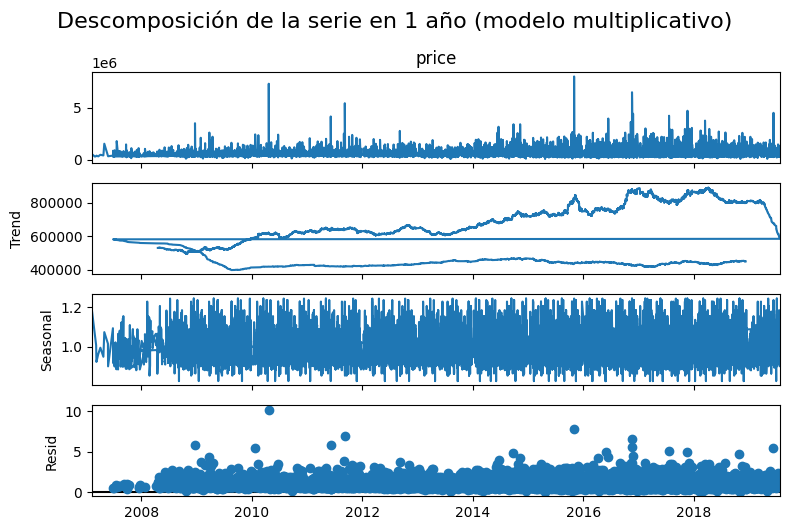

In [29]:
# Descomposición de la serie
sd = seasonal_decompose(df["price"],model="multiplicative",period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo multiplicativo)', fontsize=16, y=1.05)

# Autocovarianza

In [30]:
#Calcular la varianza de la serie de tiempo
varianza = df['price'].var()
print(varianza)

117244894333.82896


In [31]:
#Calcular la autocovarianza con lag de 1
autocovarianza_lag1 = df['price'].cov(df['price'].shift(1))
#Calcular la autocovarianza con lag de 7
autocovarianza_lag7 = df['price'].cov(df['price'].shift(7))
#Calcular la autocovarianza con lag de 30
autocovarianza_lag30 = df['price'].cov(df['price'].shift(30))
print("Autocovarianza:")
print("Autocovarianza con 1 rezago: ",round(autocovarianza_lag1,4))
print("Autocovarianza con 7 rezagos: ", round(autocovarianza_lag7,4))
print("Autocovarianza con 30 rezagos: ", round(autocovarianza_lag30,4))

Autocovarianza:
Autocovarianza con 1 rezago:  38821329633.1757
Autocovarianza con 7 rezagos:  20709178587.8648
Autocovarianza con 30 rezagos:  22363351455.5039


In [32]:
print("Comparación con la varianza:")
print("Autocovarianza con 1 rezago:", round(autocovarianza_lag1 / varianza,4))
print("Autocovarianza con 7 rezagos:", round(autocovarianza_lag7 / varianza,4))
print("Autocovarianza con 30 rezagos:", round(autocovarianza_lag30 / varianza,4))

Comparación con la varianza:
Autocovarianza con 1 rezago: 0.3311
Autocovarianza con 7 rezagos: 0.1766
Autocovarianza con 30 rezagos: 0.1907


Resultados cercanos a 1 significa que la autocovarianza es del mismo orden de magnitud que la varianza. Cuando la autocovarianza es cercana a 1 en relación con la varianza, indica una fuerte relación lineal entre los valores de la serie de tiempo y sus valores rezagados en el tiempo. En este caso, parece que la serie de tiempo exhibe una autocorrelación significativa en varios rezagos, lo que puede indicar la presencia de un patrón temporal en los datos.

#Autocorrelación

In [33]:
autocorrelation_lag1 = df['price'].autocorr(lag=1)
print("Autocorrelación con 1 rezago: ", round(autocorrelation_lag1,4))

autocorrelation_lag7 = df['price'].autocorr(lag=7)
print("Autocorrelación con 7 rezagos: ", round(autocorrelation_lag7,4))

autocorrelation_lag30 = df['price'].autocorr(lag=30)
print("Autocorrelación con 30 rezagos: ", round(autocorrelation_lag30,4))

Autocorrelación con 1 rezago:  0.3311
Autocorrelación con 7 rezagos:  0.1766
Autocorrelación con 30 rezagos:  0.1907


In [34]:
# Importar librería
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

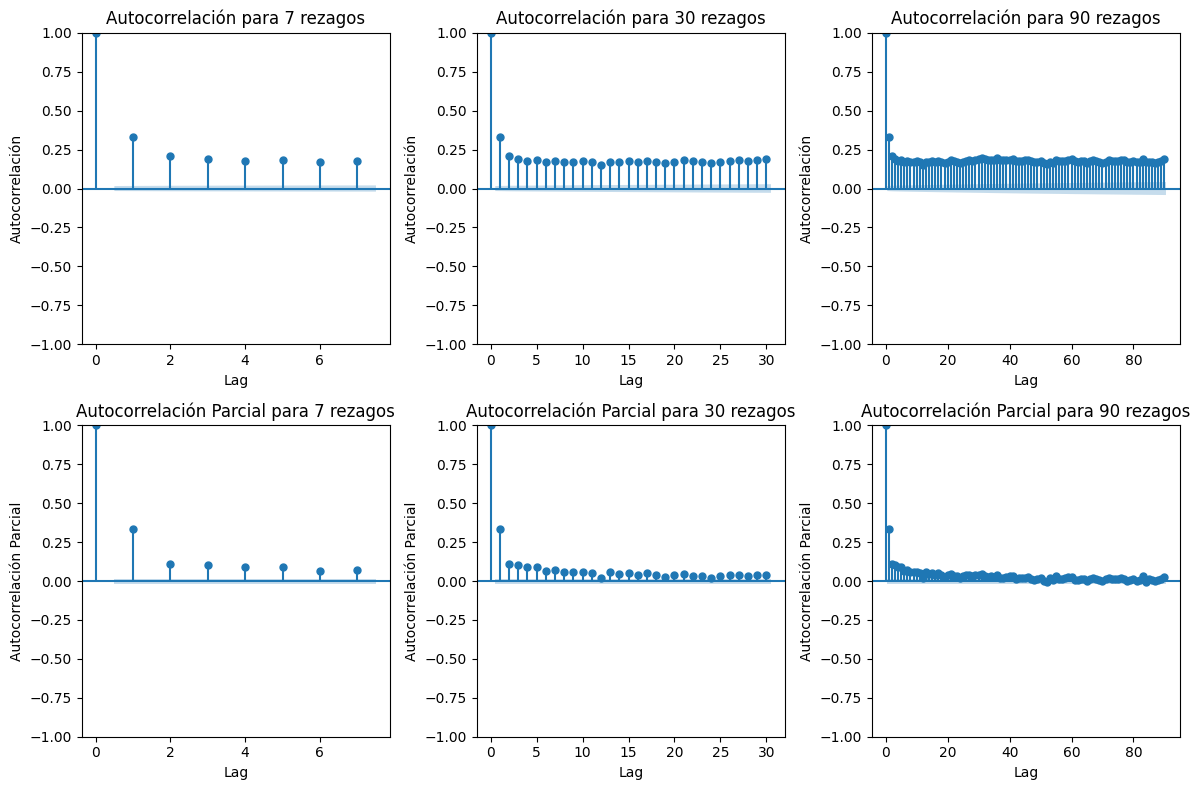

In [35]:
# Números de rezagos
lag_numbers = [7, 30, 90]

# Títulos
titles_acf = ['Autocorrelación para 7 rezagos', 'Autocorrelación para 30 rezagos', 'Autocorrelación para 90 rezagos']
titles_pacf = ['Autocorrelación Parcial para 7 rezagos', 'Autocorrelación Parcial para 30 rezagos', 'Autocorrelación Parcial para 90 rezagos']

# Configurar el número total de gráficos
num_plots = len(lag_numbers)

# Configurar el número de filas y columnas
num_rows = 2
num_cols = num_plots

# Configurar el tamaño de la figura
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Generar los gráficos de ACF
for lag, title, ax in zip(lag_numbers, titles_acf, axes[0]):
    plot_acf(df['price'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación')

# Generar los gráficos de PACF
for lag, title, ax in zip(lag_numbers, titles_pacf, axes[1]):
    plot_pacf(df['price'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación Parcial')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

#Estacionariedad

In [36]:
# Importar librerías para test de estacionariedad
from statsmodels.tsa.stattools import adfuller,kpss

In [37]:
# Definir función para calcular estacionariedad
def print_results(output, test='adf'):
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    decision = 'No Estacionaria'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Estacionaria'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Estacionaria'
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Rezagos': lags,
    'Decisión': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value

    return pd.Series(output_dict, name=test)

In [38]:
adf_output = adfuller(df['price'])
kpss_output = kpss(df['price'])
pd.concat([
    print_results(adf_output, 'adf'),
    print_results(kpss_output, 'kpss')
    ], axis=1)

C:\Users\Diego\AppData\Local\Temp\ipykernel_7452\3510780590.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(df['price'])


,adf,kpss
Test Statistic,-6.08,4.19
p-value,0.00,0.01
Rezagos,42,60
Decisión,Estacionaria,No Estacionaria
Critical Value (1%),-3.43,0.74
Critical Value (5%),-2.86,0.46
Critical Value (10%),-2.57,0.35
Critical Value (2.5%),NaN,0.57


#MODELOS ESTOCÁSTICOS

##Preprocesamiento

In [39]:
df.describe()

,postcode,price,bedrooms
count,14860.00,14860.00,14860.00
mean,2718.73,646709.75,3.22
std,144.59,342410.42,1.06
min,2600.00,56500.00,0.00
25%,2605.00,438500.00,3.00
50%,2615.00,572000.00,3.00
75%,2905.00,761000.00,4.00
max,2914.00,8000000.00,5.00


In [40]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split

# Especificar el punto de división del conjunto de entrenamiento y prueba
split_date = pd.to_datetime('2015-02-21')  # Se utiliza como fecha de corte el último mes del dataset
# (Dependiendo del caso, el tamaño del conjunto de prueba puede ser mayor o menor)

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

print(f'Train set: {train.shape}')
print(f'Test set: {test.shape}')

Train set: (7463, 4)
Test set: (7397, 4)


In [41]:
# Definir variable objetivo
y_train = train["price"]
y_test = test["price"]

In [42]:
# Últimas fechas del conjunto de entrenamiento
y_train.tail()

datesold
2015-02-19     342000
2015-02-19     685000
2015-02-20     213000
2015-02-20     725000
2015-02-21    1350000
Name: price, dtype: int64

In [43]:
# Primeras fechas del conjunto de prueba
y_test.head()

datesold
2015-02-23    439500
2015-02-23    443000
2015-02-23    615000
2015-02-23    970000
2015-02-24    549000
Name: price, dtype: int64

#Modelo AR(p)

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  retur

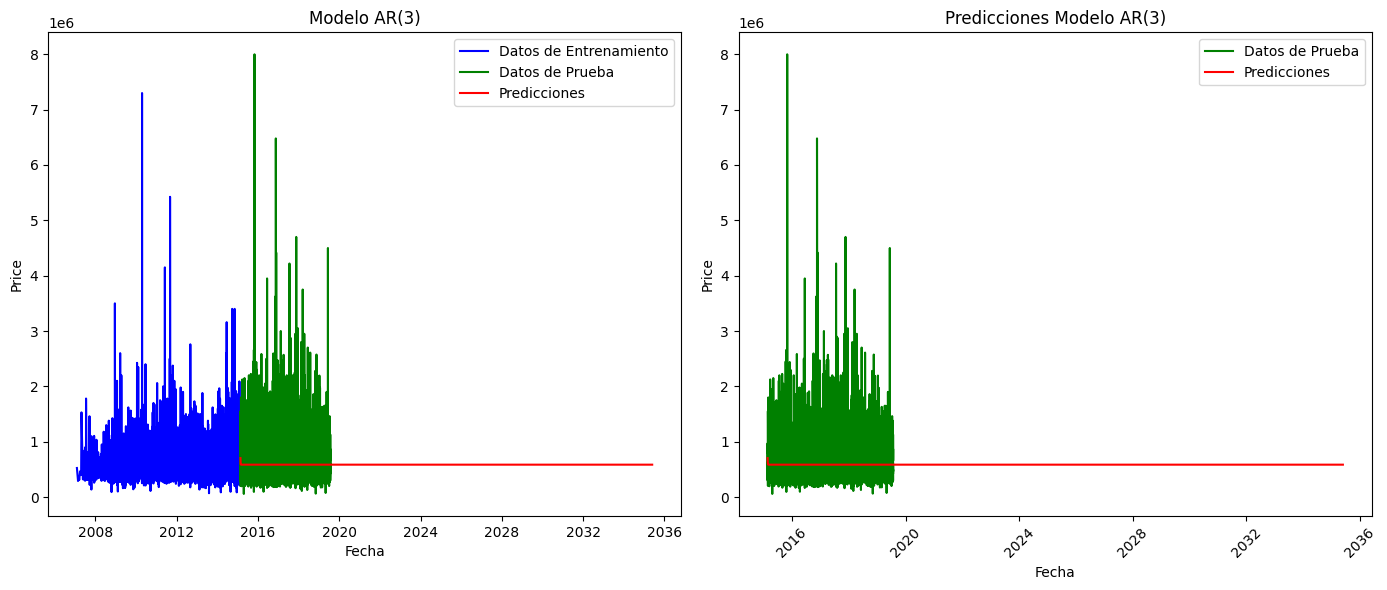

            Predicción AR(3)  Observación
Fecha                                    
2015-02-23         703480.77       439500
2015-02-24         648466.38       443000
2015-02-25         651588.19       615000
2015-02-26         607435.26       970000
2015-02-27         596075.33       549000
2015-02-28         592339.12       795000
2015-03-01         588288.90       377500
2015-03-02         586659.46       601000
2015-03-03         585948.35       900000
2015-03-04         585485.55       360000
2015-03-05         585265.38       602500
2015-03-06         585159.44       678000
2015-03-07         585100.67       830000
2015-03-08         585071.17       291000
2015-03-09         585056.42       357500
2015-03-10         585048.66       368500
2015-03-11         585044.70       540200
2015-03-12         585042.69       541500
2015-03-13         585041.65       640000
2015-03-14         585041.12       881000
2015-03-15         585040.85      1550000
2015-03-16         585040.71      

In [44]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
from statsmodels.tsa.ar_model import AutoReg

# Ajustar el modelo AR con los datos de entrenamiento
modelo_AR = AutoReg(y_train, lags=3)  # Número de rezagos (lag) en el modelo AR
result = modelo_AR.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_AR = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_AR, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Price")
plt.title("Modelo AR(3)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_AR, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Price")
plt.title("Predicciones Modelo AR(3)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción AR(3)": pred_AR, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))


In [45]:
# Metricas de evaluacion
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [46]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_AR = mean_absolute_error(y_test, pred_AR)
mape_AR = mean_absolute_percentage_error(y_test, pred_AR)
rmse_AR = rmse(y_test, pred_AR)
rmspe_AR = rmspe(y_test, pred_AR)
r2_AR = r2_score(y_test, pred_AR)

# Imprimir las métricas
print(f"MAE: {mae_AR:.2f}")
print(f"MAPE: {mape_AR:.2f}%")
print(f"RMSE: {rmse_AR:.2f}")
print(f"RMSPE: {rmspe_AR:.2f}%")
print(f"r2: {r2_AR:.2f}")

MAE: 259233.45
MAPE: 0.37%
RMSE: 409741.28
RMSPE: 5.32%
r2: -0.10


# Modelo MA

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

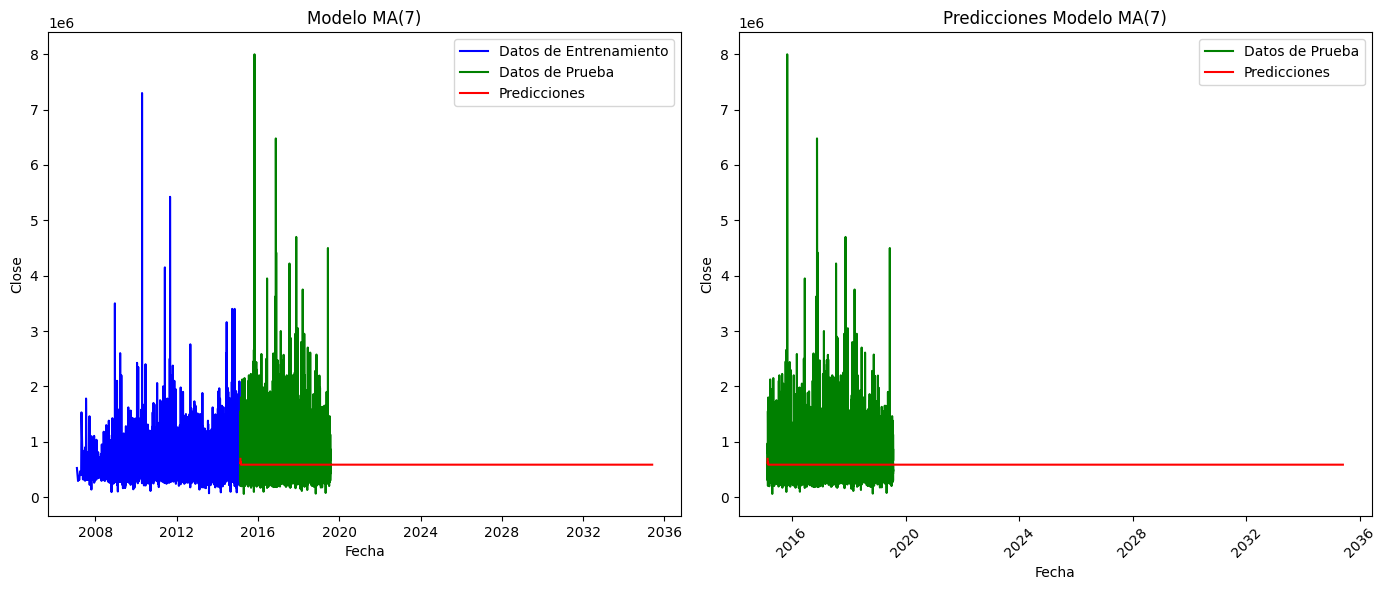

            Predicción MA(7)  Observación
Fecha                                    
2015-02-23         690454.77       439500
2015-02-24         608873.77       443000
2015-02-25         621212.18       615000
2015-02-26         618489.73       970000
2015-02-27         611939.72       549000
2015-02-28         630750.24       795000
2015-03-01         619941.74       377500
2015-03-02         584898.23       601000
2015-03-03         584898.23       900000
2015-03-04         584898.23       360000
2015-03-05         584898.23       602500
2015-03-06         584898.23       678000
2015-03-07         584898.23       830000
2015-03-08         584898.23       291000
2015-03-09         584898.23       357500
2015-03-10         584898.23       368500
2015-03-11         584898.23       540200
2015-03-12         584898.23       541500
2015-03-13         584898.23       640000
2015-03-14         584898.23       881000
2015-03-15         584898.23      1550000
2015-03-16         584898.23      

In [47]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo MA con los datos de entrenamiento
modelo_MA = ARIMA(y_train, order=(0, 0, 7))  # (p=0, d=0, q=7) para un modelo MA con 7 rezagos
result = modelo_MA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_MA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_MA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo MA(7)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_MA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo MA(7)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción MA(7)": pred_MA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))


In [48]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_MA = mean_absolute_error(y_test, pred_MA)
mape_MA = mean_absolute_percentage_error(y_test, pred_MA)
rmse_MA = rmse(y_test, pred_MA)
rmspe_MA = rmspe(y_test, pred_MA)
r2_MA = r2_score(y_test, pred_MA)

# Imprimir las métricas
print(f"MAE: {mae_MA:.2f}")
print(f"MAPE: {mape_MA:.2f}%")
print(f"RMSE: {rmse_MA:.2f}")
print(f"RMSPE: {rmspe_MA:.2f}%")
print(f"r2: {r2_MA:.2f}")

MAE: 259244.40
MAPE: 0.37%
RMSE: 409779.74
RMSPE: 5.32%
r2: -0.10


# Modelo ARMA

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

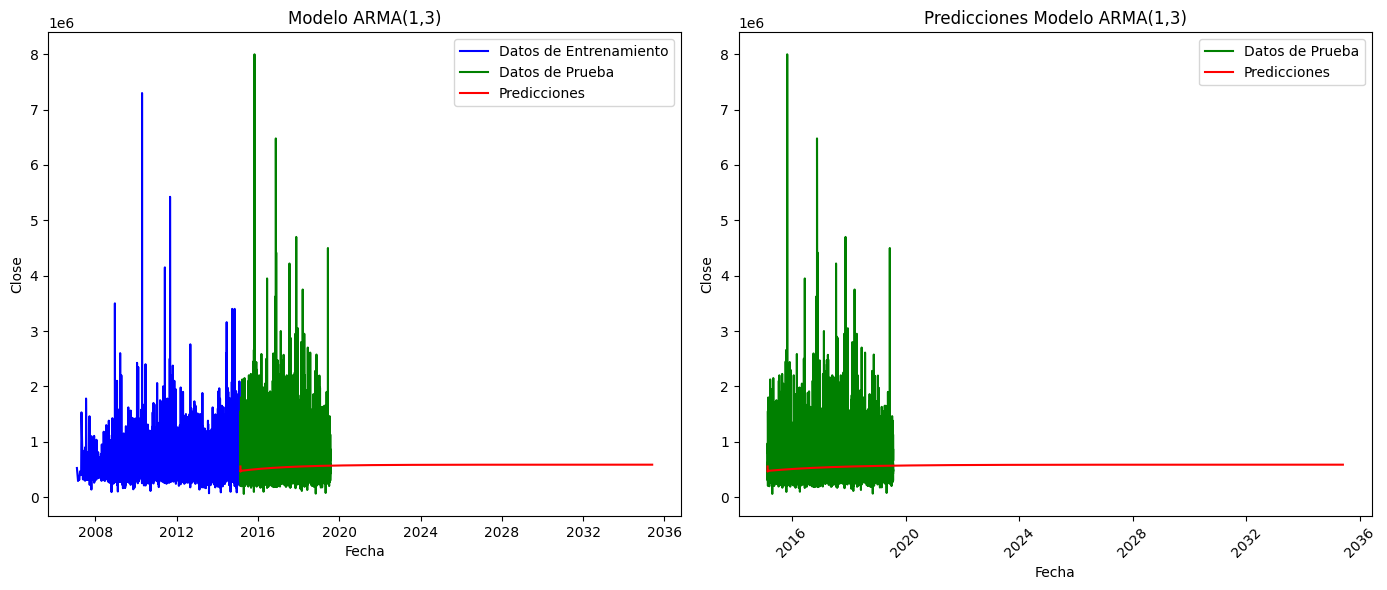

            Predicción ARMA(1,3)  Observación
Fecha                                        
2015-02-23             552321.38       439500
2015-02-24             459803.82       443000
2015-02-25             473195.66       615000
2015-02-26             473322.60       970000
2015-02-27             473449.40       549000
2015-02-28             473576.06       795000
2015-03-01             473702.57       377500
2015-03-02             473828.93       601000
2015-03-03             473955.15       900000
2015-03-04             474081.23       360000
2015-03-05             474207.17       602500
2015-03-06             474332.96       678000
2015-03-07             474458.61       830000
2015-03-08             474584.12       291000
2015-03-09             474709.48       357500
2015-03-10             474834.70       368500
2015-03-11             474959.78       540200
2015-03-12             475084.72       541500
2015-03-13             475209.51       640000
2015-03-14             475334.17  

In [49]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARMA con los datos de entrenamiento
modelo_ARMA = ARIMA(y_train, order=(1, 0, 3))  # (p=1, d=0, q=3) para un modelo ARMA con AR(1) y MA(3)
result = modelo_ARMA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_ARMA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo ARMA(1,3)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo ARMA(1,3)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción ARMA(1,3)": pred_ARMA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [50]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_ARMA = mean_absolute_error(y_test, pred_ARMA)
mape_ARMA = mean_absolute_percentage_error(y_test, pred_ARMA)
rmse_ARMA = rmse(y_test, pred_ARMA)
rmspe_ARMA = rmspe(y_test, pred_ARMA)
r2_ARMA = r2_score(y_test, pred_ARMA)

# Imprimir las métricas
print(f"MAE: {mae_ARMA:.2f}")
print(f"MAPE: {mape_ARMA:.2f}%")
print(f"RMSE: {rmse_ARMA:.2f}")
print(f"RMSPE: {rmspe_ARMA:.2f}%")
print(f"r2: {r2_ARMA:.2f}")

MAE: 264905.88
MAPE: 0.38%
RMSE: 416241.18
RMSPE: 5.28%
r2: -0.14


# Modelo ARIMA

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

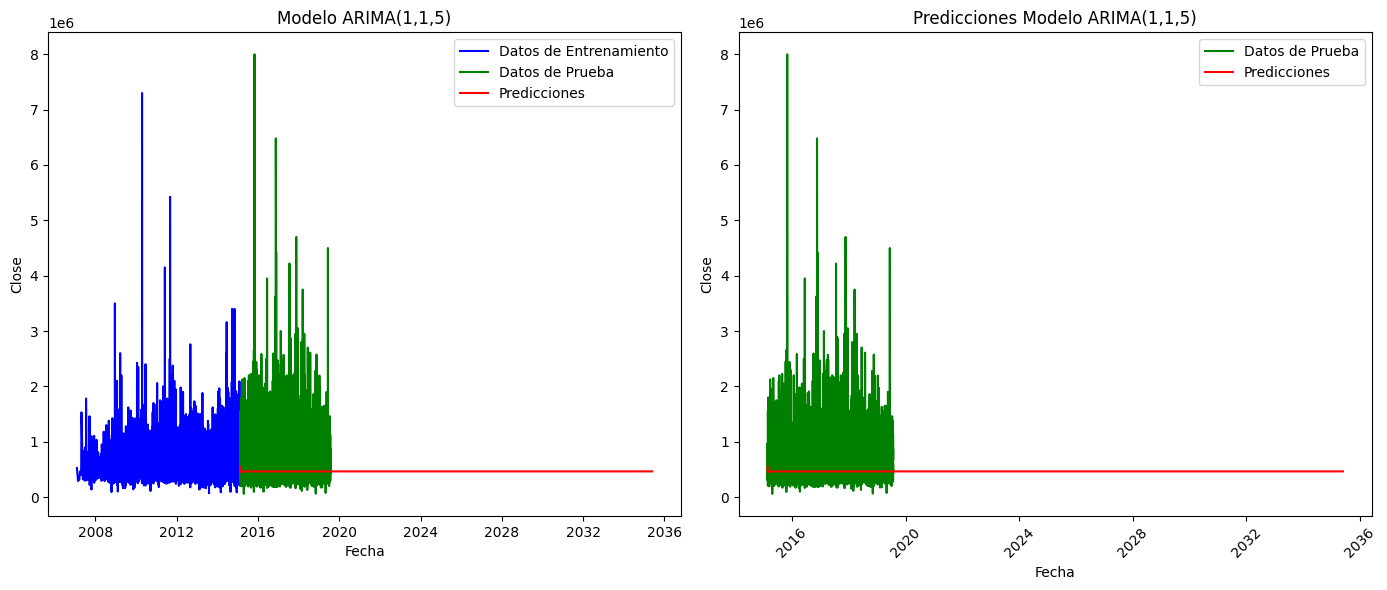

            Predicción ARIMA(1,1,5)  Observación
Fecha                                           
2015-02-23                546403.46       439500
2015-02-24                446125.10       443000
2015-02-25                446539.55       615000
2015-02-26                460979.28       970000
2015-02-27                465451.62       549000
2015-02-28                461856.45       795000
2015-03-01                464746.50       377500
2015-03-02                462423.28       601000
2015-03-03                464290.84       900000
2015-03-04                462789.56       360000
2015-03-05                463996.40       602500
2015-03-06                463026.26       678000
2015-03-07                463806.12       830000
2015-03-08                463179.21       291000
2015-03-09                463683.17       357500
2015-03-10                463278.06       368500
2015-03-11                463603.71       540200
2015-03-12                463341.93       541500
2015-03-13          

In [51]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA con los datos de entrenamiento
modelo_ARIMA = ARIMA(y_train, order=(1, 1, 5))  # (p=1, d=1, q=5) para un modelo ARIMA con AR(1), diferencia de grado 1 y MA(5)
result = modelo_ARIMA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_ARIMA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')  # typ='levels' para obtener las predicciones originales y no las diferencias

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo ARIMA(1,1,5)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo ARIMA(1,1,5)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción ARIMA(1,1,5)": pred_ARIMA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))


In [52]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_ARIMA = mean_absolute_error(y_test, pred_ARIMA)
mape_ARIMA = mean_absolute_percentage_error(y_test, pred_ARIMA)
rmse_ARIMA = rmse(y_test, pred_ARIMA)
rmspe_ARIMA = rmspe(y_test, pred_ARIMA)
r2_ARIMA = r2_score(y_test, pred_ARIMA)

# Imprimir las métricas
print(f"MAE: {mae_ARIMA:.2f}")
print(f"MAPE: {mape_ARIMA:.2f}%")
print(f"RMSE: {rmse_ARIMA:.2f}")
print(f"RMSPE: {rmspe_ARIMA:.2f}%")
print(f"r2: {r2_ARIMA:.2f}")

MAE: 299669.87
MAPE: 0.37%
RMSE: 461330.21
RMSPE: 4.57%
r2: -0.40


# Modelo SARIMA

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

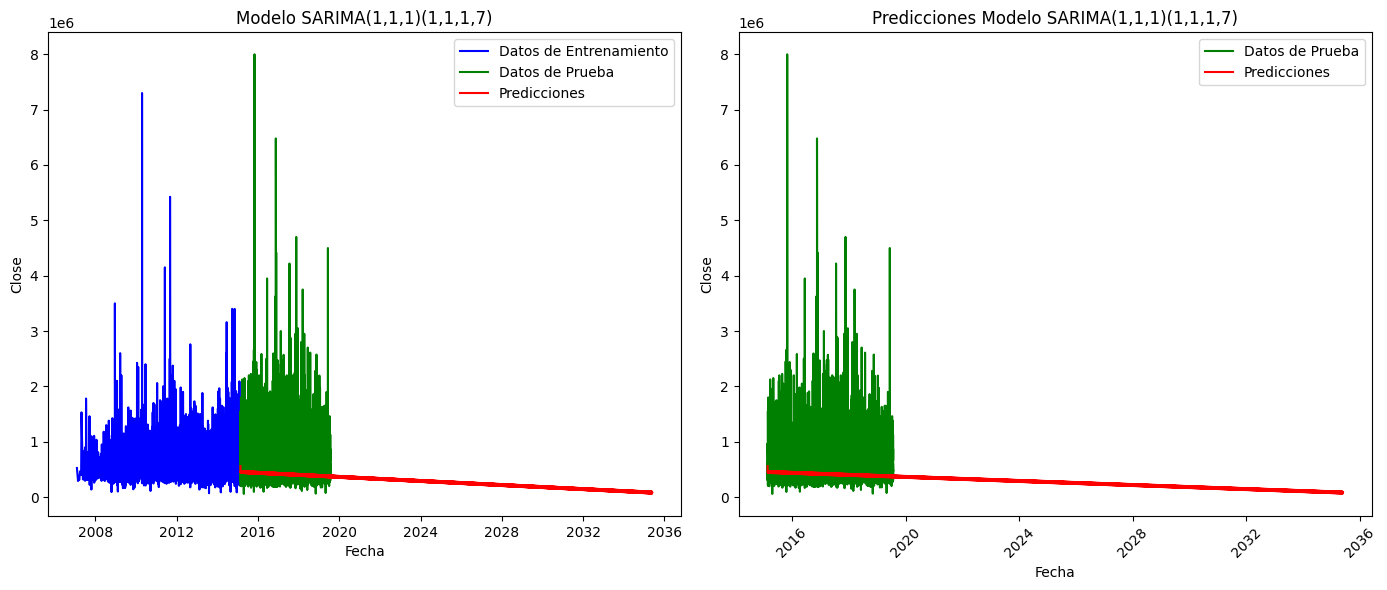

            Predicción SARIMA(1,1,1)(1,1,1,7)  Observación
Fecha                                                     
2015-02-23                          558447.49       439500
2015-02-24                          444972.52       443000
2015-02-25                          459663.37       615000
2015-02-26                          464938.74       970000
2015-02-27                          463705.05       549000
2015-02-28                          457293.14       795000
2015-03-01                          469376.50       377500
2015-03-02                          469467.20       601000
2015-03-03                          435352.09       900000
2015-03-04                          458208.56       360000
2015-03-05                          464866.19       602500
2015-03-06                          462918.75       678000
2015-03-07                          457391.24       830000
2015-03-08                          470511.29       291000
2015-03-09                          469264.16       3575

In [53]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA con los datos de entrenamiento
modelo_SARIMA = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result = modelo_SARIMA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_SARIMA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo SARIMA(1,1,1)(1,1,1,7)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo SARIMA(1,1,1)(1,1,1,7)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción SARIMA(1,1,1)(1,1,1,7)": pred_SARIMA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [54]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_SARIMA = mean_absolute_error(y_test, pred_SARIMA)
mape_SARIMA = mean_absolute_percentage_error(y_test, pred_SARIMA)
rmse_SARIMA = rmse(y_test, pred_SARIMA)
rmspe_SARIMA = rmspe(y_test, pred_SARIMA)
r2_SARIMA = r2_score(y_test, pred_SARIMA)

# Imprimir las métricas
print(f"MAE: {mae_SARIMA:.2f}")
print(f"MAPE: {mape_SARIMA:.2f}%")
print(f"RMSE: {rmse_SARIMA:.2f}")
print(f"RMSPE: {rmspe_SARIMA:.2f}%")
print(f"r2: {r2_SARIMA:.2f}")

MAE: 438397.39
MAPE: 0.57%
RMSE: 575333.80
RMSPE: 6.08%
r2: -1.17


# Modelo ARIMAX

In [55]:
# Todas las columnas excepto "Close" son variables exógenas
X_train = train.drop(columns=["price"])
X_test = test.drop(columns=["price"])

DatetimeIndex(['2007-02-07', '2007-02-27', '2007-03-07', '2007-03-09',
               '2007-03-21', '2007-04-04', '2007-04-24', '2007-04-30',
               '2007-05-24', '2007-05-25',
               ...
               '2019-07-18', '2019-07-19', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-25', '2019-07-25', '2019-07-25',
               '2019-07-26', '2019-07-26'],
              dtype='datetime64[ns]', name='datesold', length=14860, freq=None)
DatetimeIndex(['2007-02-07', '2007-02-27', '2007-03-07', '2007-03-09',
               '2007-03-21', '2007-04-04', '2007-04-24', '2007-04-30',
               '2007-05-24', '2007-05-25',
               ...
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-22',
               '2019-03-12', '2019-04-15', '2019-05-10', '2019-05-21',
               '2019-06-17', '2019-07-24'],
              dtype='datetime64[ns]', name='datesold', length=3396, freq=None)
Train set: (2047, 4)
Test set: (1349, 4)
DatetimeIndex(['2015

C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

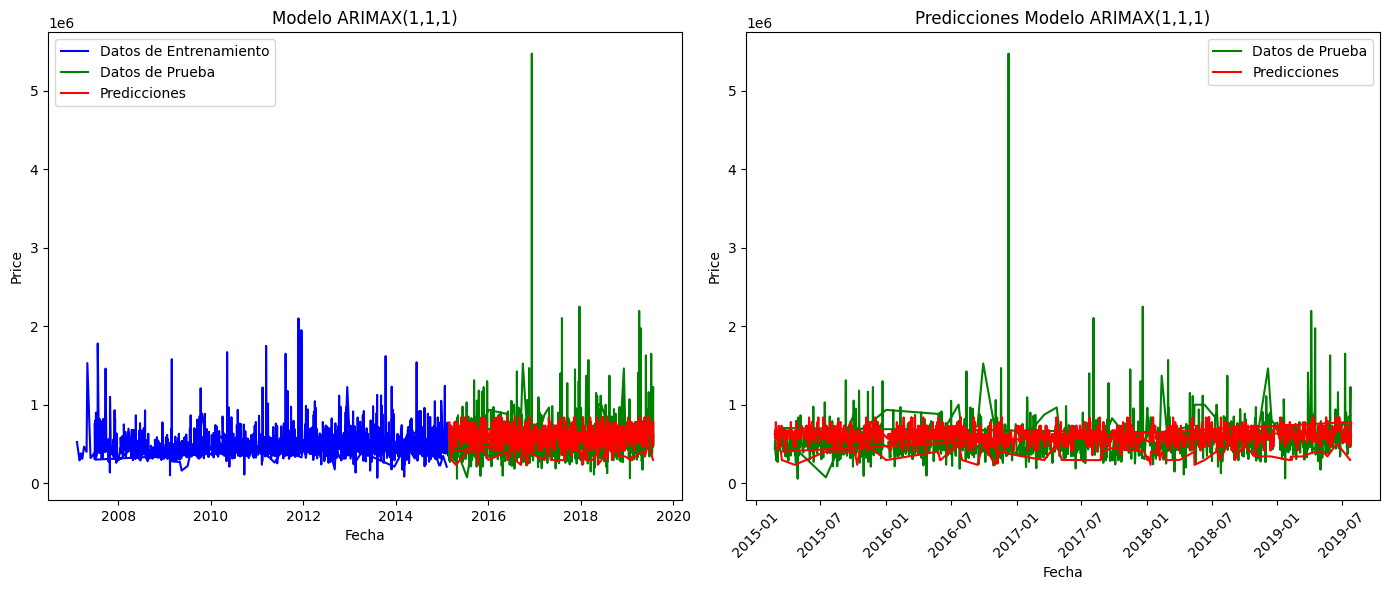

            Predicción ARIMAX(1,1,1)  Observación
Fecha                                            
2015-02-23                 626169.73    439500.00
2015-02-24                 674444.43    549000.00
2015-02-25                 566624.47    377500.00
2015-02-26                 778039.13    360000.00
2015-02-27                 568236.25    291000.00
2015-02-28                 674447.24    408000.00
2015-03-02                 674447.24    455000.00
2015-03-03                 416859.65    270000.00
2015-03-04                 629281.63    546000.00
2015-03-05                 566423.02    519000.00
2015-03-06                 732067.64    475000.00
2015-03-07                 626662.53    560000.00
2015-03-10                 462831.14    412000.00
2015-03-11                 674245.77    539000.00
2015-03-13                 627468.41    471000.00
2015-03-14                 733276.46    507000.00
2015-03-16                 673842.83    581000.00
2015-03-17                 672231.07    470000.00


In [67]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Verificar que 'datesold' es el índice y que está en el formato datetime
df.index = pd.to_datetime(df.index)

# Verificar el índice
print(df.index)

# Eliminar duplicados en el índice
df = df[~df.index.duplicated(keep='first')]

# Verificar el índice nuevamente
print(df.index)

# Definir la fecha de corte
split_date = pd.to_datetime('2015-02-21')

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

print(f'Train set: {train.shape}')
print(f'Test set: {test.shape}')

# Seleccionar la columna objetivo (price) y las variables exógenas
y_train = train['price'].astype(float)  # Asegurarse de que 'price' sea de tipo float
y_test = test['price'].astype(float)  # Asegurarse de que 'price' sea de tipo float
X_train = train.drop(columns=['price'])
X_test = test.drop(columns=['price'])

# Convertir columnas categóricas a variables dummy
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurarse de que X_train y X_test tienen las mismas columnas después de convertir a dummies
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Asegurarse de que no hay valores NaN
X_train = X_train.fillna(0).astype(float)
X_test = X_test.fillna(0).astype(float)

# Verificar que y_test no esté vacío
if y_test.empty:
    raise ValueError("y_test está vacío. Asegúrate de que contiene datos.")

# Asegurarse de que el índice de y_test es válido
if not y_test.index.is_monotonic_increasing:
    y_test = y_test.sort_index()

# No es necesario establecer una frecuencia diaria si las fechas no son continuas
# y_test = y_test.asfreq('D') # Esto se omite ya que puede causar problemas si las fechas no son continuas

print(y_test.index)  # Verificar el índice después de la corrección

# Ajustar el modelo ARIMAX con los datos de entrenamiento
modelo_ARIMAX = ARIMA(y_train, order=(1, 1, 1), exog=X_train)
result = modelo_ARIMAX.fit()

# Hacer predicciones en el conjunto de prueba
pred_ARIMAX = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test, dynamic=False)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(test.index, pred_ARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Price")
plt.title("Modelo ARIMAX(1,1,1)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(test.index, pred_ARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Price")
plt.title("Predicciones Modelo ARIMAX(1,1,1)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": test.index, "Predicción ARIMAX(1,1,1)": pred_ARIMAX, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))



# Modelo SARIMAX

DatetimeIndex(['2007-02-07', '2007-02-27', '2007-03-07', '2007-03-09',
               '2007-03-21', '2007-04-04', '2007-04-24', '2007-04-30',
               '2007-05-24', '2007-05-25',
               ...
               '2019-07-18', '2019-07-19', '2019-07-23', '2019-07-24',
               '2019-07-25', '2019-07-25', '2019-07-25', '2019-07-25',
               '2019-07-26', '2019-07-26'],
              dtype='datetime64[ns]', name='datesold', length=14860, freq=None)
Train set: (7463, 4)
Test set: (7397, 4)


C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\envs\gpu\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

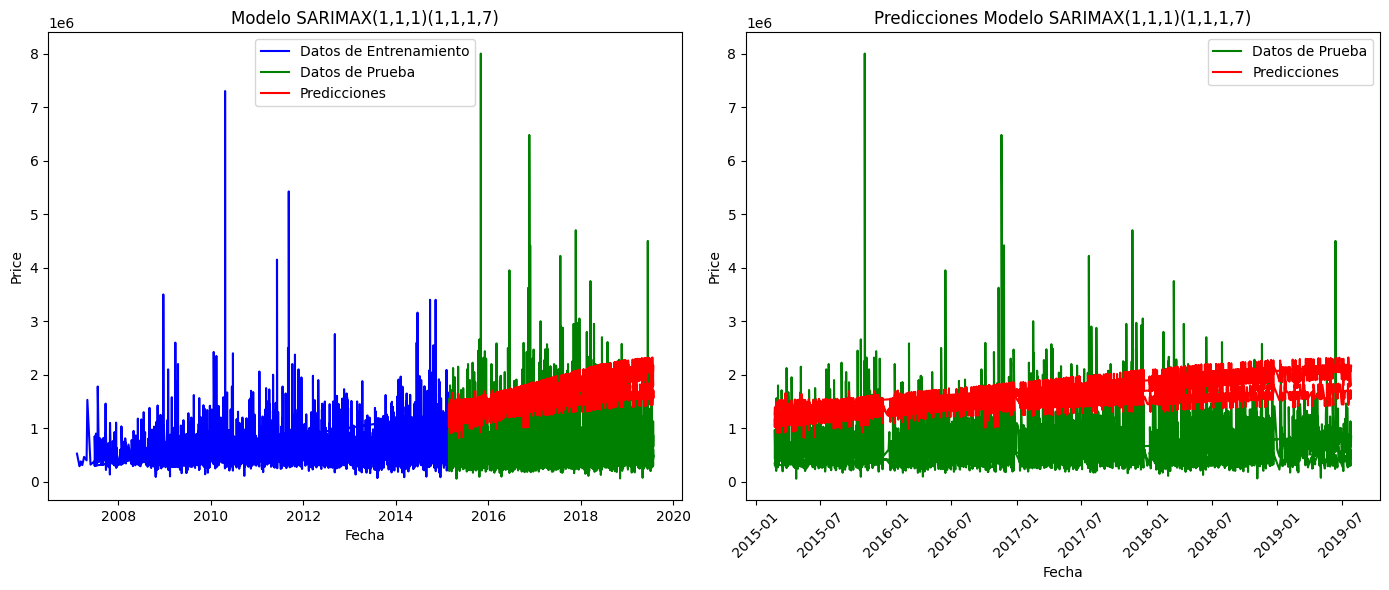

            Predicción SARIMAX(1,1,1)(1,1,1,7)  Observación
Fecha                                                      
2015-02-23                          1235272.99    439500.00
2015-02-23                          1146423.49    443000.00
2015-02-23                          1030975.76    615000.00
2015-02-23                          1171930.12    970000.00
2015-02-24                          1160197.50    549000.00
2015-02-24                          1161908.97    795000.00
2015-02-25                          1049960.76    377500.00
2015-02-25                          1300476.85    601000.00
2015-02-25                          1273799.89    900000.00
2015-02-26                          1289471.02    360000.00
2015-02-26                          1167614.49    602500.00
2015-02-26                          1293647.43    678000.00
2015-02-26                          1288935.29    830000.00
2015-02-27                          1045351.50    291000.00
2015-02-27                          1039

In [60]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asegurarse de que la columna 'datesold' es del tipo datetime y configurarla como índice
df.index = pd.to_datetime(df.index)

# Verificar el índice
print(df.index)

# Definir la fecha de corte
split_date = pd.to_datetime('2015-02-21')

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

print(f'Train set: {train.shape}')
print(f'Test set: {test.shape}')

# Seleccionar la columna objetivo (price) y las variables exógenas
y_train = train['price'].astype(float)  # Asegurarse de que 'price' sea de tipo float
y_test = test['price'].astype(float)  # Asegurarse de que 'price' sea de tipo float

# Asegurarse de que las variables exógenas sean numéricas y manejar valores NaN
X_train = train.drop(columns=['price'])
X_test = test.drop(columns=['price'])

# Convertir columnas categóricas a variables dummy
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurarse de que X_train y X_test tienen las mismas columnas después de convertir a dummies
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Asegurarse de que no hay valores NaN
X_train = X_train.fillna(0).astype(float)
X_test = X_test.fillna(0).astype(float)

# Ajustar el modelo SARIMAX con los datos de entrenamiento
modelo_SARIMAX = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result = modelo_SARIMAX.fit()

# Hacer predicciones en el conjunto de prueba
pred_SARIMAX = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(test.index, pred_SARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Price")
plt.title("Modelo SARIMAX(1,1,1)(1,1,1,7)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(test.index, pred_SARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Price")
plt.title("Predicciones Modelo SARIMAX(1,1,1)(1,1,1,7)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": test.index, "Predicción SARIMAX(1,1,1)(1,1,1,7)": pred_SARIMAX, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))
